<a href="https://colab.research.google.com/github/maty91ok/Licienciatura-Ciencia-de-Datos/blob/main/tp_Final_Mat%C3%ADas_Canevaro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Practico Final

Selección del Dataset

In [ ]:
from bs4 import BeautifulSoup
import re
import requests

def descarga_dataset(url:str, nombre_del_archivo: str):
    matches = re.findall(r'/file/d/([a-zA-Z0-9_-]+)', url)
    if matches:
        file_id = matches[0]
        url_download = f"https://drive.google.com/uc?id={file_id}"
        try:
            response = requests.get(url=url_download)
            page = BeautifulSoup(response.content, "html.parser")
            url = page.find("form", id="download-form").get("action")
        except Exception:
            url = url_download
        !wget {url} -O {nombre_del_archivo}
    else:
        print("File ID not found")

descarga_dataset(
    url="https://drive.google.com/file/d/1aRJaWKQFJq-GoY1kEcHC5sV3_a58nrdN/view?usp=drive_link",
    nombre_del_archivo="tp_final/data/raw/dataset.csv"
)


--2024-11-26 02:49:27--  https://drive.google.com/uc?id=1aRJaWKQFJq-GoY1kEcHC5sV3_a58nrdN
Resolving drive.google.com (drive.google.com)... 142.250.107.139, 142.250.107.100, 142.250.107.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1aRJaWKQFJq-GoY1kEcHC5sV3_a58nrdN [following]
--2024-11-26 02:49:27--  https://drive.usercontent.google.com/download?id=1aRJaWKQFJq-GoY1kEcHC5sV3_a58nrdN
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7205918 (6.9M) [application/octet-stream]
Saving to: ‘tp_final/data/raw/dataset.csv’

tp_final/data/raw/d 100%[===================>]   6.87M  --.-KB/s    in 0.04s   

2024-11-26 0

Carga de Datos a una Base de Datos

In [ ]:
from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker

Base = declarative_base()

class Tabla1(Base):
    __tablename__ = 'tabla1'
    id = Column(Integer, primary_key=True)
    columna1 = Column(String)
    columna2 = Column(Float)

class Tabla2(Base):
    __tablename__ = 'tabla2'
    id = Column(Integer, primary_key=True)
    tabla1_id = Column(Integer, ForeignKey('tabla1.id'))
    columna3 = Column(String)
    relacion = relationship("Tabla1", back_populates="relacion")

Tabla1.relacion = relationship("Tabla2", order_by=Tabla2.id, back_populates="relacion")

# Crear la base de datos
engine = create_engine("sqlite:///tp_final/data/interim/database.db")
Base.metadata.create_all(engine)


<ipython-input-26-f0e19ce5f654>:5: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


 Extracción de Datos

In [ ]:
result = session.query(ExampleTable).filter(ExampleTable.column2 > 10).all()
filtered_data = pd.DataFrame([(r.id, r.column1, r.column2) for r in result], columns=['id', 'column1', 'column2'])
filtered_data.to_csv('tp_final/data/interim/filtered_data.csv', index=False)


 Procesamiento del Dataset


In [ ]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('tp_final/data/raw/dataset.csv')

# Mostrar los nombres de las columnas
print(df.columns)

# Mostrar las primeras filas del DataFrame
print(df.head())

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id'],
      dtype='object')
                    tramite_tipo tramite_fecha fecha_inscripcion_inicial  \
0  INSCRIPCION INICIAL IMPORTADO    2024-02-09                2024-02-09   
1  INSCRIPCION INICIAL IMPORTADO    2024-02-15             


Visualización de Datos


In [ ]:
df = pd.read_csv('tp_final/data/interim/filtered_data.csv')

# Aplicar filtros
df_filtered = df[df['column1'].str.contains('regex_pattern')]
df_filtered = df_filtered[df_filtered['column2'] > 20]

df_filtered.to_csv('tp_final/data/processed/processed_data.csv', index=False)


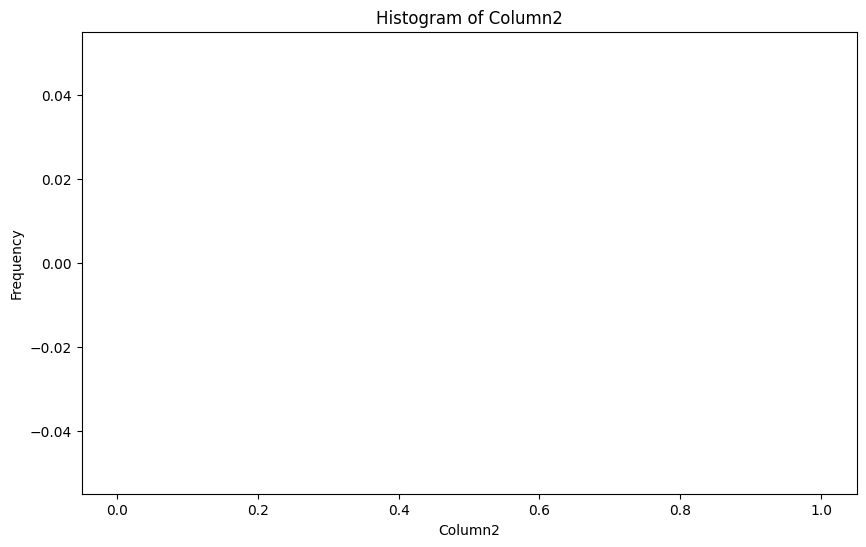

In [ ]:
import matplotlib.pyplot as plt

df_final = pd.read_csv('tp_final/data/processed/processed_data.csv')
plt.figure(figsize=(10, 6))
plt.hist(df_final['column2'], bins=30)
plt.xlabel('Column2')
plt.ylabel('Frequency')
plt.title('Histogram of Column2')
plt.savefig('tp_final/data/processed/histogram.png')
plt.show()